In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from counterflow_file import *

In [2]:
# run cases
phif = [1.3, 1.5, 1.7, 2.3, 3.2, 4.8, 9.5]
phio = [0.2, 0.4, 0.6]

# parameters
flame_params = {}
flame_params['F'] = 'CH4'
flame_params['p'] = 1.
flame_params['a'] = 200.
flame_params['phif'] = None
flame_params['phio'] = None
flame_params['tf'] = 300.
flame_params['to'] = 300.

In [3]:
# plot
# use TEX for interpreter
plt.rc('text',usetex=True)
# figure and axes parameters
# total width is fixed, for one column plot
plot_width    = 6.7
margin_left   = 0.7
margin_right  = 0.2
margin_bottom = 0.5
margin_top    = 0.1
space_width   = 0.
space_height  = 1.0
ftsize        = 6

nrow = 1
ncol = 1

subplot_width = (plot_width-margin_left-margin_right-(ncol-1)*space_width)/ncol
subplot_height = subplot_width * 0.8

plot_height = (nrow*subplot_height
              +margin_bottom
              +margin_top
              +(nrow-1)*space_height)

font = {'family':'serif',
        'weight':'normal',
        'size':ftsize}

plt.rc('font',**font)

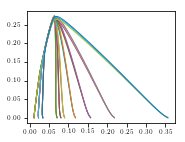

In [4]:
# generate figure and axes
fig, ax = plt.subplots(nrow,ncol,sharey=True,
                       figsize=cm2inch(plot_width,plot_height))

for f in phif:
    flame_params['phif'] = f
    for o in phio:
        flame_params['phio'] = o
        
        case_name = params2name( flame_params )
        file_name = '{}.dat'.format( case_name )
        
        data = np.genfromtxt( file_name, skip_header = 3, names = True )
        ax.plot( data['Z1'], data['C_4spe'], lw = 1 )

In [5]:
fig.savefig('zc.pdf')